In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


THE SPARKS FOUNDATION
  DATA SCIENCE AND BUSINESS ANALYSTICS INTERSHIP
  SAHAJ GUPTA
  EXPLORATORY DATA ANALYSIS -SPORTS

IMPORTING LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import iplot
import seaborn as sns
%matplotlib inline
sns.set()
from subprocess import check_output
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

**JOINING DIRNAME AND FILENAME**

In [3]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/Indian Premier League'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Colab Notebooks/Indian Premier League/deliveries.csv
/content/drive/MyDrive/Colab Notebooks/Indian Premier League/matches.csv


**DATASET VISULISATION**

In [4]:
deliveries_data=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Indian Premier League/deliveries.csv')
deliveries_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
matches_data=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Indian Premier League/matches.csv')
matches_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


***DATA PREPROCESSING***

In [6]:
matches_data.team1.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
matches_data.team2.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
matches_data.winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
matches_data.venue.replace({'Feroz Shah Kotla Ground':'Feroz Shah Kotla',
                    'M Chinnaswamy Stadium':'M. Chinnaswamy Stadium',
                    'MA Chidambaram Stadium, Chepauk':'M.A. Chidambaram Stadium',
                     'M. A. Chidambaram Stadium':'M.A. Chidambaram Stadium',
                     'Punjab Cricket Association IS Bindra Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'Punjab Cricket Association Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'IS Bindra Stadium':'Punjab Cricket Association Stadium',
                    'Rajiv Gandhi International Stadium, Uppal':'Rajiv Gandhi International Stadium',
                    'Rajiv Gandhi Intl. Cricket Stadium':'Rajiv Gandhi International Stadium'},regex=True,inplace=True)

In [7]:
matches_data.drop('umpire3', axis=1, inplace=True)
matches_data.columns.unique()

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

In [8]:
matches_data['season'].unique()


array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019])

In [9]:
matches_data['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Delhi Capitals'],
      dtype=object)

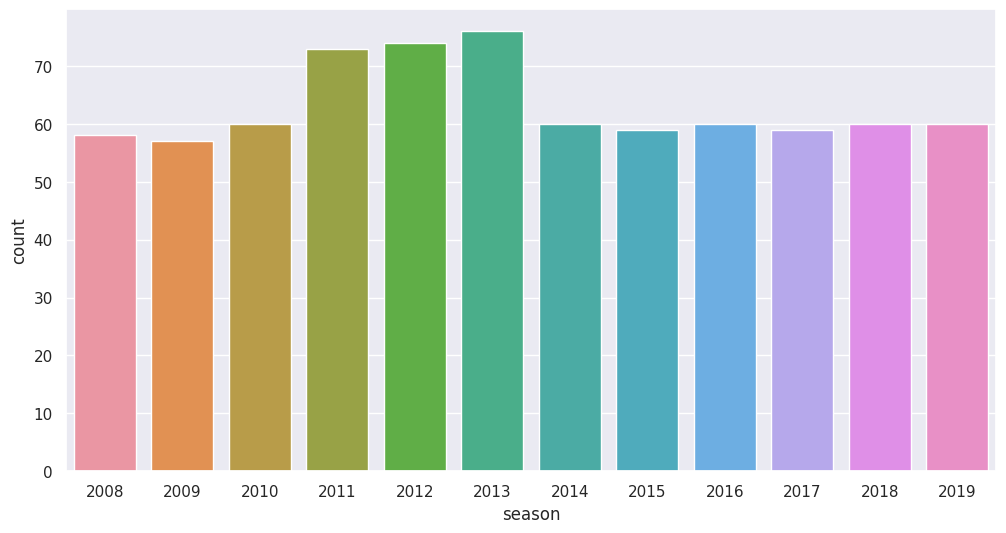

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(x='season', data=matches_data)
plt.show()

Top 15 Cities with the maximum number of Matches Played:
              city  Match Counts
23         Mumbai           101
21        Kolkata            77
10          Delhi            74
2       Bangalore            66
14      Hyderabad            64
8         Chennai            57
16         Jaipur            47
7      Chandigarh            46
26           Pune            38
12         Durban            15
3       Bengaluru            14
31  Visakhapatnam            13
1       Ahmedabad            12
6       Centurion            12
22         Mohali            10


Text(0.5, 1.0, 'Top 15 Cities that have hosted IPL Matches')

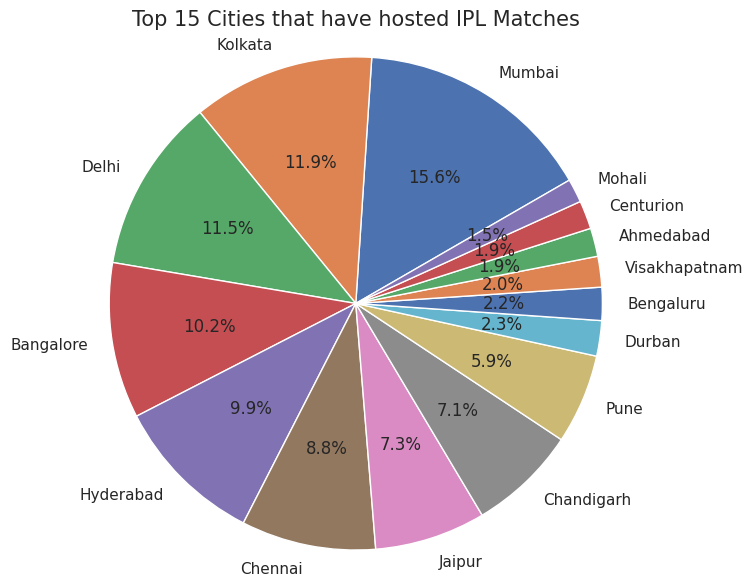

In [11]:
city_counts=matches_data.groupby('city').apply(lambda x:x['city'].count()).reset_index(name='Match Counts')
top_cities_order=city_counts.sort_values(by='Match Counts',ascending=False)
top_cities=top_cities_order[:15]
print('Top 15 Cities with the maximum number of Matches Played:\n',top_cities)
plt.figure(figsize=(7,7))
plt.pie(top_cities['Match Counts'],labels=top_cities['city'],autopct='%1.1f%%', startangle=30)
plt.axis('equal')
plt.title('Top 15 Cities that have hosted IPL Matches',size=15)

Top 15 Stadiums with the maximum number of Matches Played:
                                                 venue  Match Counts
15                             M. Chinnaswamy Stadium            80
8                                        Eden Gardens            77
9                                    Feroz Shah Kotla            74
34                                   Wankhede Stadium            73
23                 Rajiv Gandhi International Stadium            64
16                           M.A. Chidambaram Stadium            57
22                 Punjab Cricket Association Stadium            56
26                             Sawai Mansingh Stadium            47
17            Maharashtra Cricket Association Stadium            21
5                          Dr DY Patil Sports Academy            17
31                         Subrata Roy Sahara Stadium            17
14                                          Kingsmead            15
32                                    SuperSport Park   

Text(0.5, 1.0, 'Top 15 Stadiums that have hosted IPL Matches')

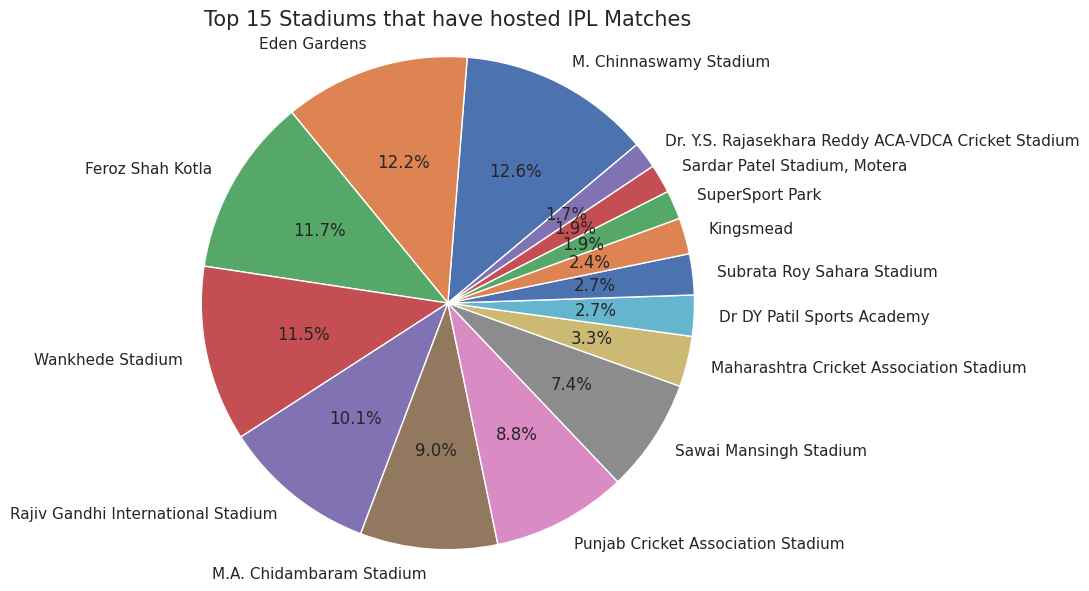

In [12]:
venue_counts=matches_data.groupby('venue').apply(lambda x:x['venue'].count()).reset_index(name='Match Counts')
top_venues_order=venue_counts.sort_values(by='Match Counts',ascending=False)
top_venues=top_venues_order[:15]
print('Top 15 Stadiums with the maximum number of Matches Played:\n',top_venues)
plt.figure(figsize=(7,7))
plt.pie(top_venues['Match Counts'],labels=top_venues['venue'],autopct='%1.1f%%', startangle=40)
plt.axis('equal')
plt.title('Top 15 Stadiums that have hosted IPL Matches',size=15)

**SUCCESSFUL TEAMS**

In [13]:
matches_played = matches_data['team1'].value_counts()+ matches_data['team2'].value_counts()
matches_played

Chennai Super Kings            164
Deccan Chargers                 75
Delhi Capitals                  16
Delhi Daredevils               161
Gujarat Lions                   30
Kings XI Punjab                176
Kochi Tuskers Kerala            14
Kolkata Knight Riders          178
Mumbai Indians                 187
Pune Warriors                   46
Rajasthan Royals               147
Rising Pune Supergiant          30
Royal Challengers Bangalore    180
Sunrisers Hyderabad            108
dtype: int64

In [14]:
matches_won = matches_data.groupby('winner').count()
matches_won["id"]

winner
Chennai Super Kings            100
Deccan Chargers                 29
Delhi Capitals                  10
Delhi Daredevils                67
Gujarat Lions                   13
Kings XI Punjab                 82
Kochi Tuskers Kerala             6
Kolkata Knight Riders           92
Mumbai Indians                 109
Pune Warriors                   12
Rajasthan Royals                75
Rising Pune Supergiant          15
Royal Challengers Bangalore     84
Sunrisers Hyderabad             58
Name: id, dtype: int64

<Axes: xlabel='winner'>

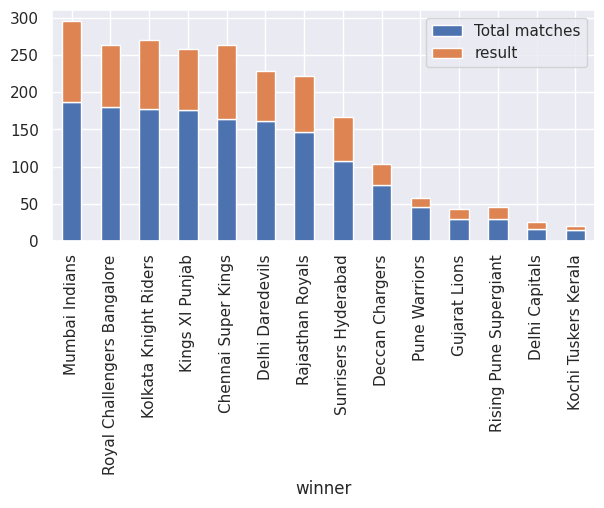

In [15]:
matches_won = matches_data.groupby('winner').count()
matches_won

total_matches = matches_data['team1'].value_counts()+ matches_data['team2'].value_counts()
total_matches

matches_won['Total matches']=total_matches
matches_won[["Total matches","result"]].sort_values(by=["Total matches"],ascending=False).plot.bar(stacked=True,figsize=(7,3))

In [16]:
def annot_plot(ax,w,h):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))

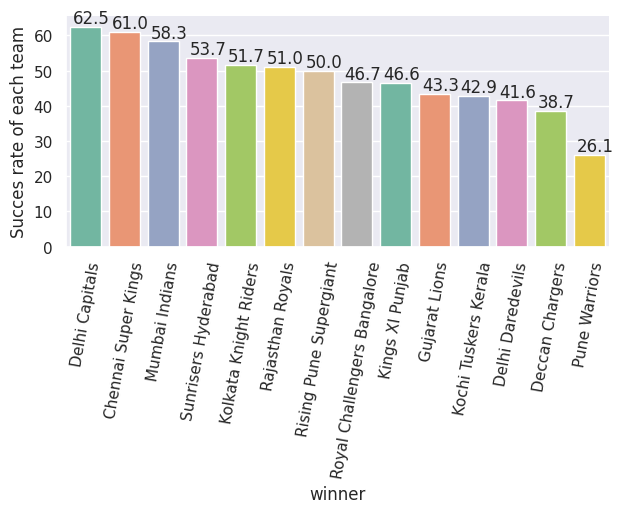

In [17]:
match_succes_rate = (matches_won["id"]/total_matches)*100


data = match_succes_rate.sort_values(ascending = False)
plt.figure(figsize=(7,3))
ax = sns.barplot(x = data.index, y = data, palette="Set2");
plt.ylabel('Succes rate of each team')
plt.xticks(rotation=80)
annot_plot(ax,0.08,1)

In [18]:
season_winner = matches_data.groupby('season')['season','winner'].tail(1)
season_winner.sort_values(by="season",ascending=True)

,season,winner
116,2008,Rajasthan Royals
173,2009,Deccan Chargers
233,2010,Chennai Super Kings
306,2011,Chennai Super Kings
380,2012,Kolkata Knight Riders
456,2013,Mumbai Indians
516,2014,Kolkata Knight Riders
575,2015,Mumbai Indians
635,2016,Sunrisers Hyderabad
58,2017,Mumbai Indians


<Axes: xlabel='winner'>

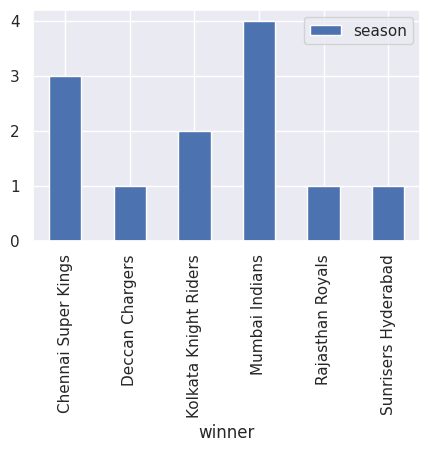

In [19]:
season_winner.groupby('winner').count().plot.bar(figsize=(5,3))

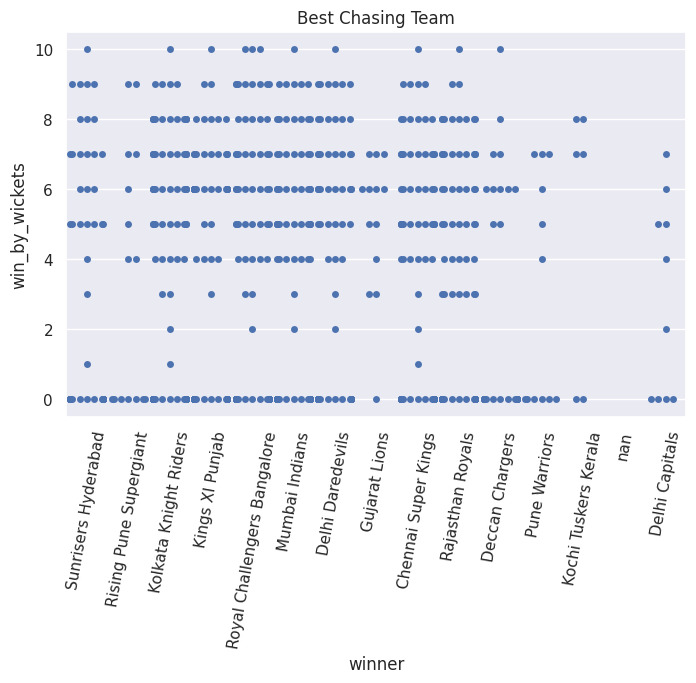

In [20]:
matches_data[['season','winner','win_by_wickets']][matches_data['win_by_wickets'] ==1]
plt.figure(figsize=(8,5))
sns.swarmplot(y='win_by_wickets',x='winner',data=matches_data)
plt.xticks(rotation=80)
plt.title('Best Chasing Team')
plt.show()

FACTOR AFFECTING WIN/LOSS.

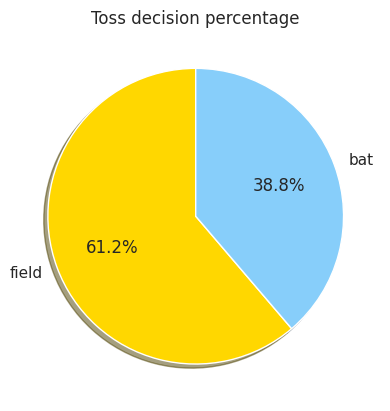

In [21]:
temp_series = matches_data.toss_decision.value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['gold', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Toss decision percentage")
plt.show()

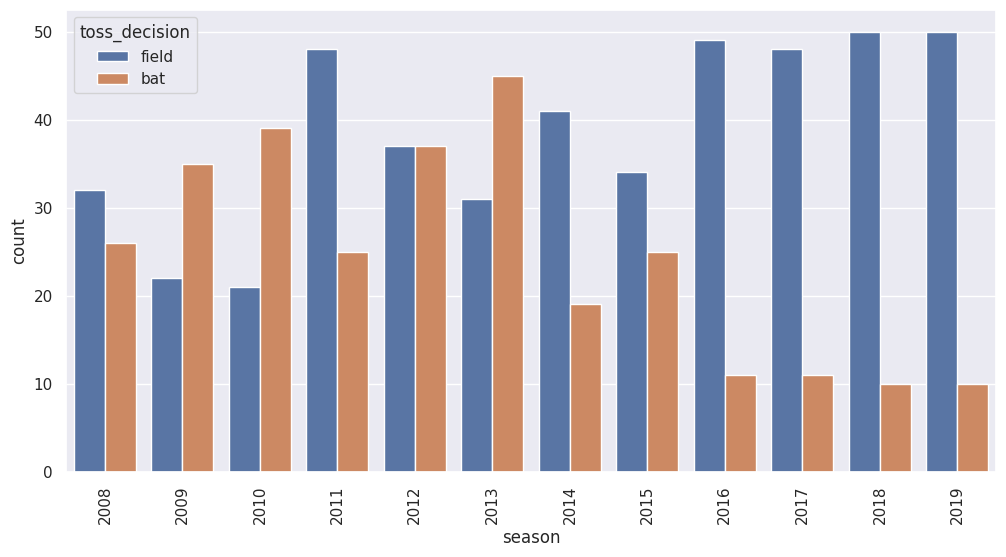

In [22]:
plt.figure(figsize=(12,6))
sns.countplot(x='season', hue='toss_decision', data=matches_data)
plt.xticks(rotation='vertical')
plt.show()

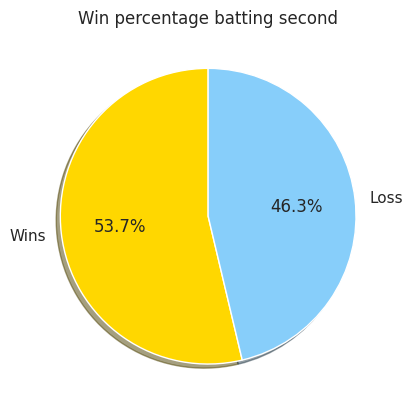

In [23]:
num_of_wins = (matches_data.win_by_wickets>0).sum()
num_of_loss = (matches_data.win_by_wickets==0).sum()
labels = ["Wins", "Loss"]
total = float(num_of_wins + num_of_loss)
sizes = [(num_of_wins/total)*100, (num_of_loss/total)*100]
colors = ['gold', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Win percentage batting second")
plt.show()

SUCCESSFUL BATSMAN

In [24]:
batting_top= deliveries_data.groupby('batsman').apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Runs')
batting_sorted=batting_top.sort_values(by='Runs',ascending=False)
top_batsmen=batting_sorted[:10]
print('The Top 10 Batsmen in thr Tournament are:\n',top_batsmen)
fig = px.bar(top_batsmen, x='batsman', y='Runs',
             hover_data=['batsman'], color='Runs',title='Top 10 Batsmen in IPL- Seasons 2008-2019')
fig.show()

The Top 10 Batsmen in thr Tournament are:
             batsman  Runs
486         V Kohli  5434
428        SK Raina  5415
367       RG Sharma  4914
112       DA Warner  4741
392        S Dhawan  4632
92         CH Gayle  4560
290        MS Dhoni  4477
384      RV Uthappa  4446
26   AB de Villiers  4428
147       G Gambhir  4223


The Top 10 Batting Performances in the IPL History are:
             batsman  Innings Runs  Balls Faced  Strike Rate for Match  inning  \
0          CH Gayle           175           69             253.623188       1   
69      BB McCullum           158           77             205.194805       1   
146  AB de Villiers           133           61             218.032787       1   
207         RR Pant           130           64             203.125000       1   
271  AB de Villiers           129           53             243.396226       1   
324        CH Gayle           128           62             206.451613       1   
386         M Vijay           127           57             222.807018       1   
443       DA Warner           126           60             210.000000       1   
503        V Sehwag           122           62             196.774194       1   
565       SR Watson           121           60             201.666667       2   

                    batting_team                 bo

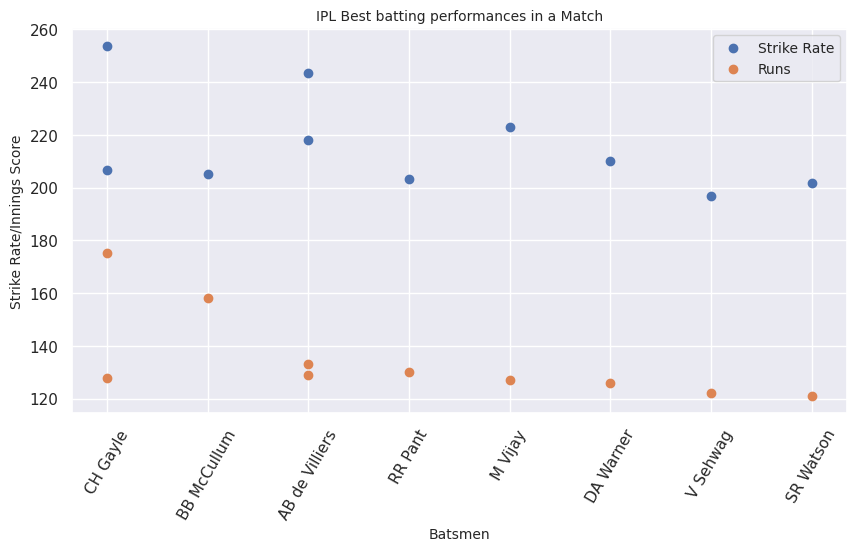

In [25]:
batting_ings = deliveries_data.groupby(['match_id','batsman']).apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Innings Runs')
batting_ings_sorted=batting_ings.sort_values(by='Innings Runs',ascending=False)
top_batsmen_scores=batting_ings_sorted[:10]
batsman_ball_faced=deliveries_data.groupby(['match_id','batsman']).apply(lambda x:x['batsman_runs'].count()).reset_index(name='Balls Faced')
batsmen_performance=pd.merge(top_batsmen_scores,batsman_ball_faced,how='inner',left_on=['match_id','batsman'],right_on=['match_id','batsman'])
batsmen_performance['Strike Rate for Match']=batsmen_performance['Innings Runs']*100/batsmen_performance['Balls Faced']
batsmen_innings=pd.merge(batsmen_performance,deliveries_data,how='inner',left_on=['match_id','batsman'],right_on=['match_id','batsman'])
batsmen_innings_req=batsmen_innings.iloc[:,1:8]
batsmen_innings_req_2=batsmen_innings_req.drop_duplicates()
print('The Top 10 Batting Performances in the IPL History are:\n',batsmen_innings_req_2)
x=batsmen_innings_req_2['batsman']
y1=batsmen_innings_req_2['Strike Rate for Match']
y2=batsmen_innings_req_2['Innings Runs']
plt.figure(figsize=(10,5))
plt.scatter(x,y1)
plt.scatter(x,y2)
plt.xlabel('Batsmen',size=10)
plt.ylabel('Strike Rate/Innings Score',size=10)
plt.title('IPL Best batting performances in a Match',size=10)
plt.xticks(rotation=60)
plt.legend(['Strike Rate','Runs'],prop={'size':10})

SUCCESSFUL BOLWERS

In [28]:
bowling_wickets=deliveries_data[deliveries_data['dismissal_kind']!='run out']
bowling_tot=bowling_wickets.groupby('bowler').apply(lambda x:x['dismissal_kind'].dropna()).reset_index(name='Wickets')
bowling_wick_count=bowling_tot.groupby('bowler').count().reset_index()
bowling_top=bowling_wick_count.sort_values(by='Wickets',ascending=False)
top_bowlers=bowling_top.loc[:,['bowler','Wickets']][0:10]
print('The Top Wicket Takers in the Tournament are:\n',top_bowlers)
fig = px.bar(top_bowlers, x='bowler', y='Wickets',
             hover_data=['bowler'], color='Wickets',title='Top 10 Bowlers in IPL- Seasons 2008-2019')
fig.show()


The Top Wicket Takers in the Tournament are:
               bowler  Wickets
290       SL Malinga      170
6           A Mishra      156
110  Harbhajan Singh      150
227        PP Chawla      149
82          DJ Bravo      147
46           B Kumar      133
232         R Ashwin      125
296        SP Narine      122
326         UT Yadav      119
244        RA Jadeja      108


The Top 10 Batting Performances in the IPL History are:
               bowler  Wickets  Runs Conceeded  Runs per Wicket  inning  \
0            A Zampa        6              19         3.166667       1   
24          A Joseph        6              18         3.000000       2   
48     Sohail Tanvir        6              15         2.500000       1   
72        AS Rajpoot        5              16         3.200000       1   
96        SL Malinga        5              13         2.600000       1   
119          B Kumar        5              20         4.000000       2   
144         A Mishra        5              17         3.400000       2   
168  Harbhajan Singh        5              18         3.600000       2   
193         MM Patel        5              25         5.000000       1   
217       JD Unadkat        5              30         6.000000       2   

            batting_team             bowling_team  
0    Sunrisers Hyderabad  Rising Pune Supergiants  
24   Sunrisers Hyderabad

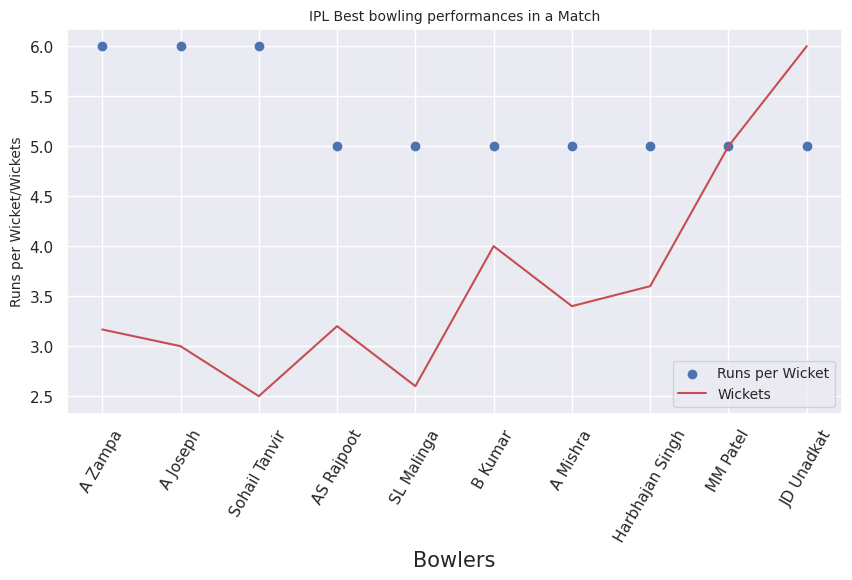

In [29]:
match_bowling_tot=bowling_wickets.groupby(['match_id','bowler']).apply(lambda x:x['dismissal_kind'].dropna()).reset_index(name='Wickets')
match_bowling_wick_count=match_bowling_tot.groupby(['match_id','bowler']).count().reset_index()
match_bowling_top=match_bowling_wick_count.sort_values(by='Wickets',ascending=False)
match_top_bowlers=match_bowling_top.loc[:,['match_id','bowler','Wickets']][0:10]
match_bowling_runs=deliveries_data.groupby(['match_id','bowler']).apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Runs Conceeded')
match_bowler_performance=pd.merge(match_top_bowlers,match_bowling_runs,how='inner',left_on=['match_id','bowler'],right_on=['match_id','bowler'])
match_bowler_performance['Runs per Wicket']=match_bowler_performance['Runs Conceeded']/match_bowler_performance['Wickets']
bowler_innings=pd.merge(match_bowler_performance,deliveries_data,how='inner',left_on=['match_id','bowler'],right_on=['match_id','bowler'])
bowler_innings_req=bowler_innings.iloc[:,1:8]
bowler_innings_req_2=bowler_innings_req.drop_duplicates()
print('The Top 10 Batting Performances in the IPL History are:\n',bowler_innings_req_2)
x=bowler_innings_req_2['bowler']
y1=bowler_innings_req_2['Wickets']
y2=bowler_innings_req_2['Runs per Wicket']
plt.figure(figsize=(10,5))
plt.scatter(x,y1)
plt.plot(x,y2,'r')
plt.xlabel('Bowlers',size=15)
plt.ylabel('Runs per Wicket/Wickets',size=10)
plt.title('IPL Best bowling performances in a Match',size=10)
plt.xticks(rotation=60)
plt.legend(['Runs per Wicket','Wickets'],prop={'size':10})


SUCCESSFUL FIELDERS

In [30]:
fielder_list=deliveries_data.groupby('fielder').apply(lambda x:x).dropna().reset_index()
fielder_list_count=fielder_list.groupby('fielder').count()
fielder_list_counts=fielder_list_count['dismissal_kind'].reset_index(name='Dismissals')
fielder_list_max=fielder_list_counts.sort_values(by='Dismissals',ascending=False)
top_fielders=fielder_list_max[0:10]
print('The Best Fielders(and WicketKeepers) in the Torunament are:\n',top_fielders)

fig = px.bar(top_fielders, x='fielder', y='Dismissals',
             hover_data=['fielder'], color='Dismissals',title='Top 10 Fielders in IPL- Seasons 2008-2019')
fig.show()

The Best Fielders(and WicketKeepers) in the Torunament are:
             fielder  Dismissals
279        MS Dhoni         159
206      KD Karthik         152
372      RV Uthappa         125
412        SK Raina         115
19   AB de Villiers         114
313        PA Patel          97
355       RG Sharma          92
470         V Kohli          90
200      KA Pollard          85
484         WP Saha          82


MOST MEN OF THE MATCH AWARDS

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'CH Gayle'),
  Text(1, 0, 'AB de Villiers'),
  Text(2, 0, 'MS Dhoni'),
  Text(3, 0, 'DA Warner'),
  Text(4, 0, 'RG Sharma'),
  Text(5, 0, 'YK Pathan'),
  Text(6, 0, 'SR Watson'),
  Text(7, 0, 'SK Raina'),
  Text(8, 0, 'G Gambhir'),
  Text(9, 0, 'MEK Hussey')])

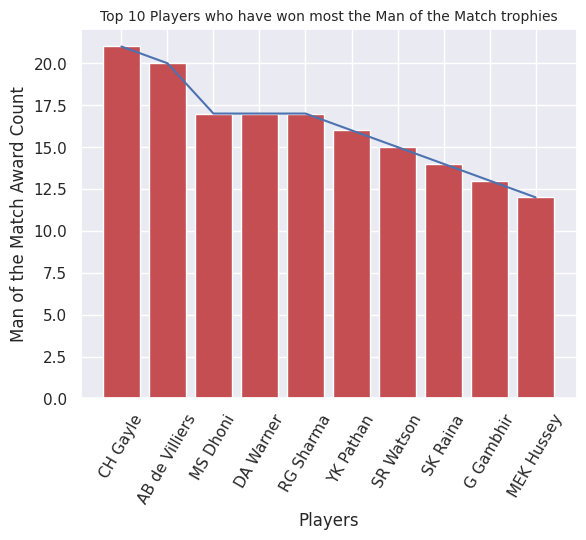

In [37]:
motm=matches_data.groupby('player_of_match').apply(lambda x:x['player_of_match'].count()).reset_index(name='Man of the Match Awards')
motm_sort=motm.sort_values(by='Man of the Match Awards',ascending=False)
motm_top=motm_sort[0:10]
plt.plot(motm_top['player_of_match'],motm_top['Man of the Match Awards'],color='b')
plt.bar(motm_top['player_of_match'],motm_top['Man of the Match Awards'],color='r')
plt.xlabel('Players')
plt.ylabel('Man of the Match Award Count')
plt.title('Top 10 Players who have won most the Man of the Match trophies',size=10)
plt.xticks(rotation=60)

PURPLE CAPS IN EACH SEASON

In [36]:
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]
purple=deliveries_data[deliveries_data["dismissal_kind"].isin(dismissal_kinds)]
purple=purple.merge(matches_data,left_on='match_id',right_on='id',how='outer')
purple=purple.groupby(['season','bowler'])['dismissal_kind'].count().reset_index()
purple=purple.sort_values('dismissal_kind',ascending=False)
purple=purple.drop_duplicates('season',keep='first').sort_values(by='season')
purple.rename({'dismissal_kind':'count_wickets'},axis=1,inplace=True)
trace1 = go.Bar(x=purple['season'].values,y=purple['count_wickets'].values,
                name='Total Matches',text=purple['bowler'].values,
                marker=dict(color='rgb(75,0,130)',
                            line=dict(color='rgb(75,0,130)',width=1.5,)),
                opacity=0.7)

layout = go.Layout(title='Purple-Cap Holders',xaxis = dict(tickmode='linear',title="Year"),
                   yaxis=dict(title='Wickets'))

data=[trace1]
fig = go.Figure(data=data, layout=layout)
iplot(fig)


ORANGE CAP IN EACH SEASON

In [35]:
orange=matches_data[['id','season']]
orange=orange.merge(deliveries_data,left_on='id',right_on='match_id',how='left')
orange=orange.groupby(['season','batsman'])['batsman_runs'].sum().reset_index()
orange=orange.sort_values('batsman_runs',ascending=0)
orange=orange.drop_duplicates(subset=["season"],keep="first")

data = [go.Bar(x=orange['season'].values,y=orange['batsman_runs'].values,
                name='Total Matches',text=orange['batsman'].values,
                marker=dict(color='rgb(255,140,0)',
                            line=dict(color='rgb(8,48,107)',width=1.5,)),opacity=0.7)]

layout = go.Layout(title='Orange-Cap Holders',xaxis = dict(tickmode='linear',title="Year"),
                   yaxis=dict(title='Runs'))
fig = go.Figure(data=data, layout=layout)
fig.show()